# Diabetes Health Indicator

---

**Authors:**  
- Anshu Anand  
- Nayan Mahto  
- Om Kumar  
- Saket Kumar

---


This notebook presents an analysis of key health indicators related to diabetes. Explore the data, visualizations, and insights to better understand diabetes risk factors and trends.


Importing Modules

In [1]:
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns     # For advanced visualizations


📊 Loading Data and Getting Descriptions

In [2]:
Data = pd.read_csv("https://raw.githubusercontent.com/Om-Kumar-Ace/Diabetes-Health-Indicator/refs/heads/main/Data/diabetes_data.csv")  # Load training dataset
X = Data.copy()                  # Create a copy for manipulation
X.describe(include="all")        # Get descriptive statistics of all columns


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
print(X.dtypes)

Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object


Searching for null values

In [8]:
print("Null value count: ",X.isnull().sum())

Null value count:  Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64


<Axes: >

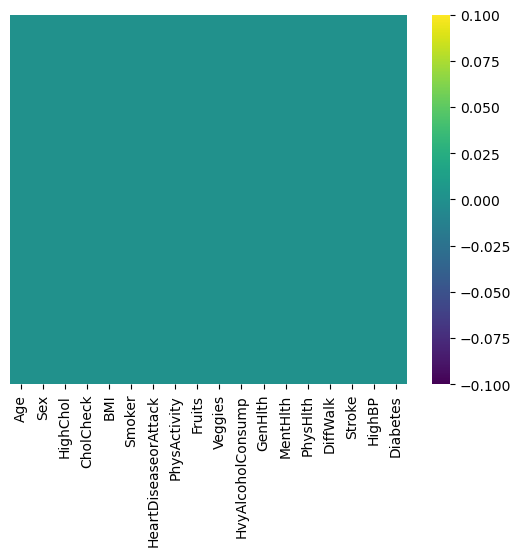

In [9]:
sns.heatmap(X.isnull(), yticklabels=False, cbar=True, cmap='viridis')


Correlation Analysis of Features with Diabetes

In [12]:
features = X.columns[:-1]  # Assuming 'Diabetes' is the last column

# Print correlation of each feature with the target
print("\nCorrelation of each attribute with Diabetes:\n")
for col in features:
    corr = X[col].corr(X['Diabetes'])
    print(f"{col}: {corr:.4f}")


Correlation of each attribute with Diabetes:

Age: 0.2787
Sex: 0.0444
HighChol: 0.2892
CholCheck: 0.1154
BMI: 0.2934
Smoker: 0.0860
HeartDiseaseorAttack: 0.2115
PhysActivity: -0.1587
Fruits: -0.0541
Veggies: -0.0793
HvyAlcoholConsump: -0.0949
GenHlth: 0.4076
MentHlth: 0.0870
PhysHlth: 0.2131
DiffWalk: 0.2726
Stroke: 0.1254
HighBP: 0.3815


📊 Distribution & Boxplot Visualization for Key Features

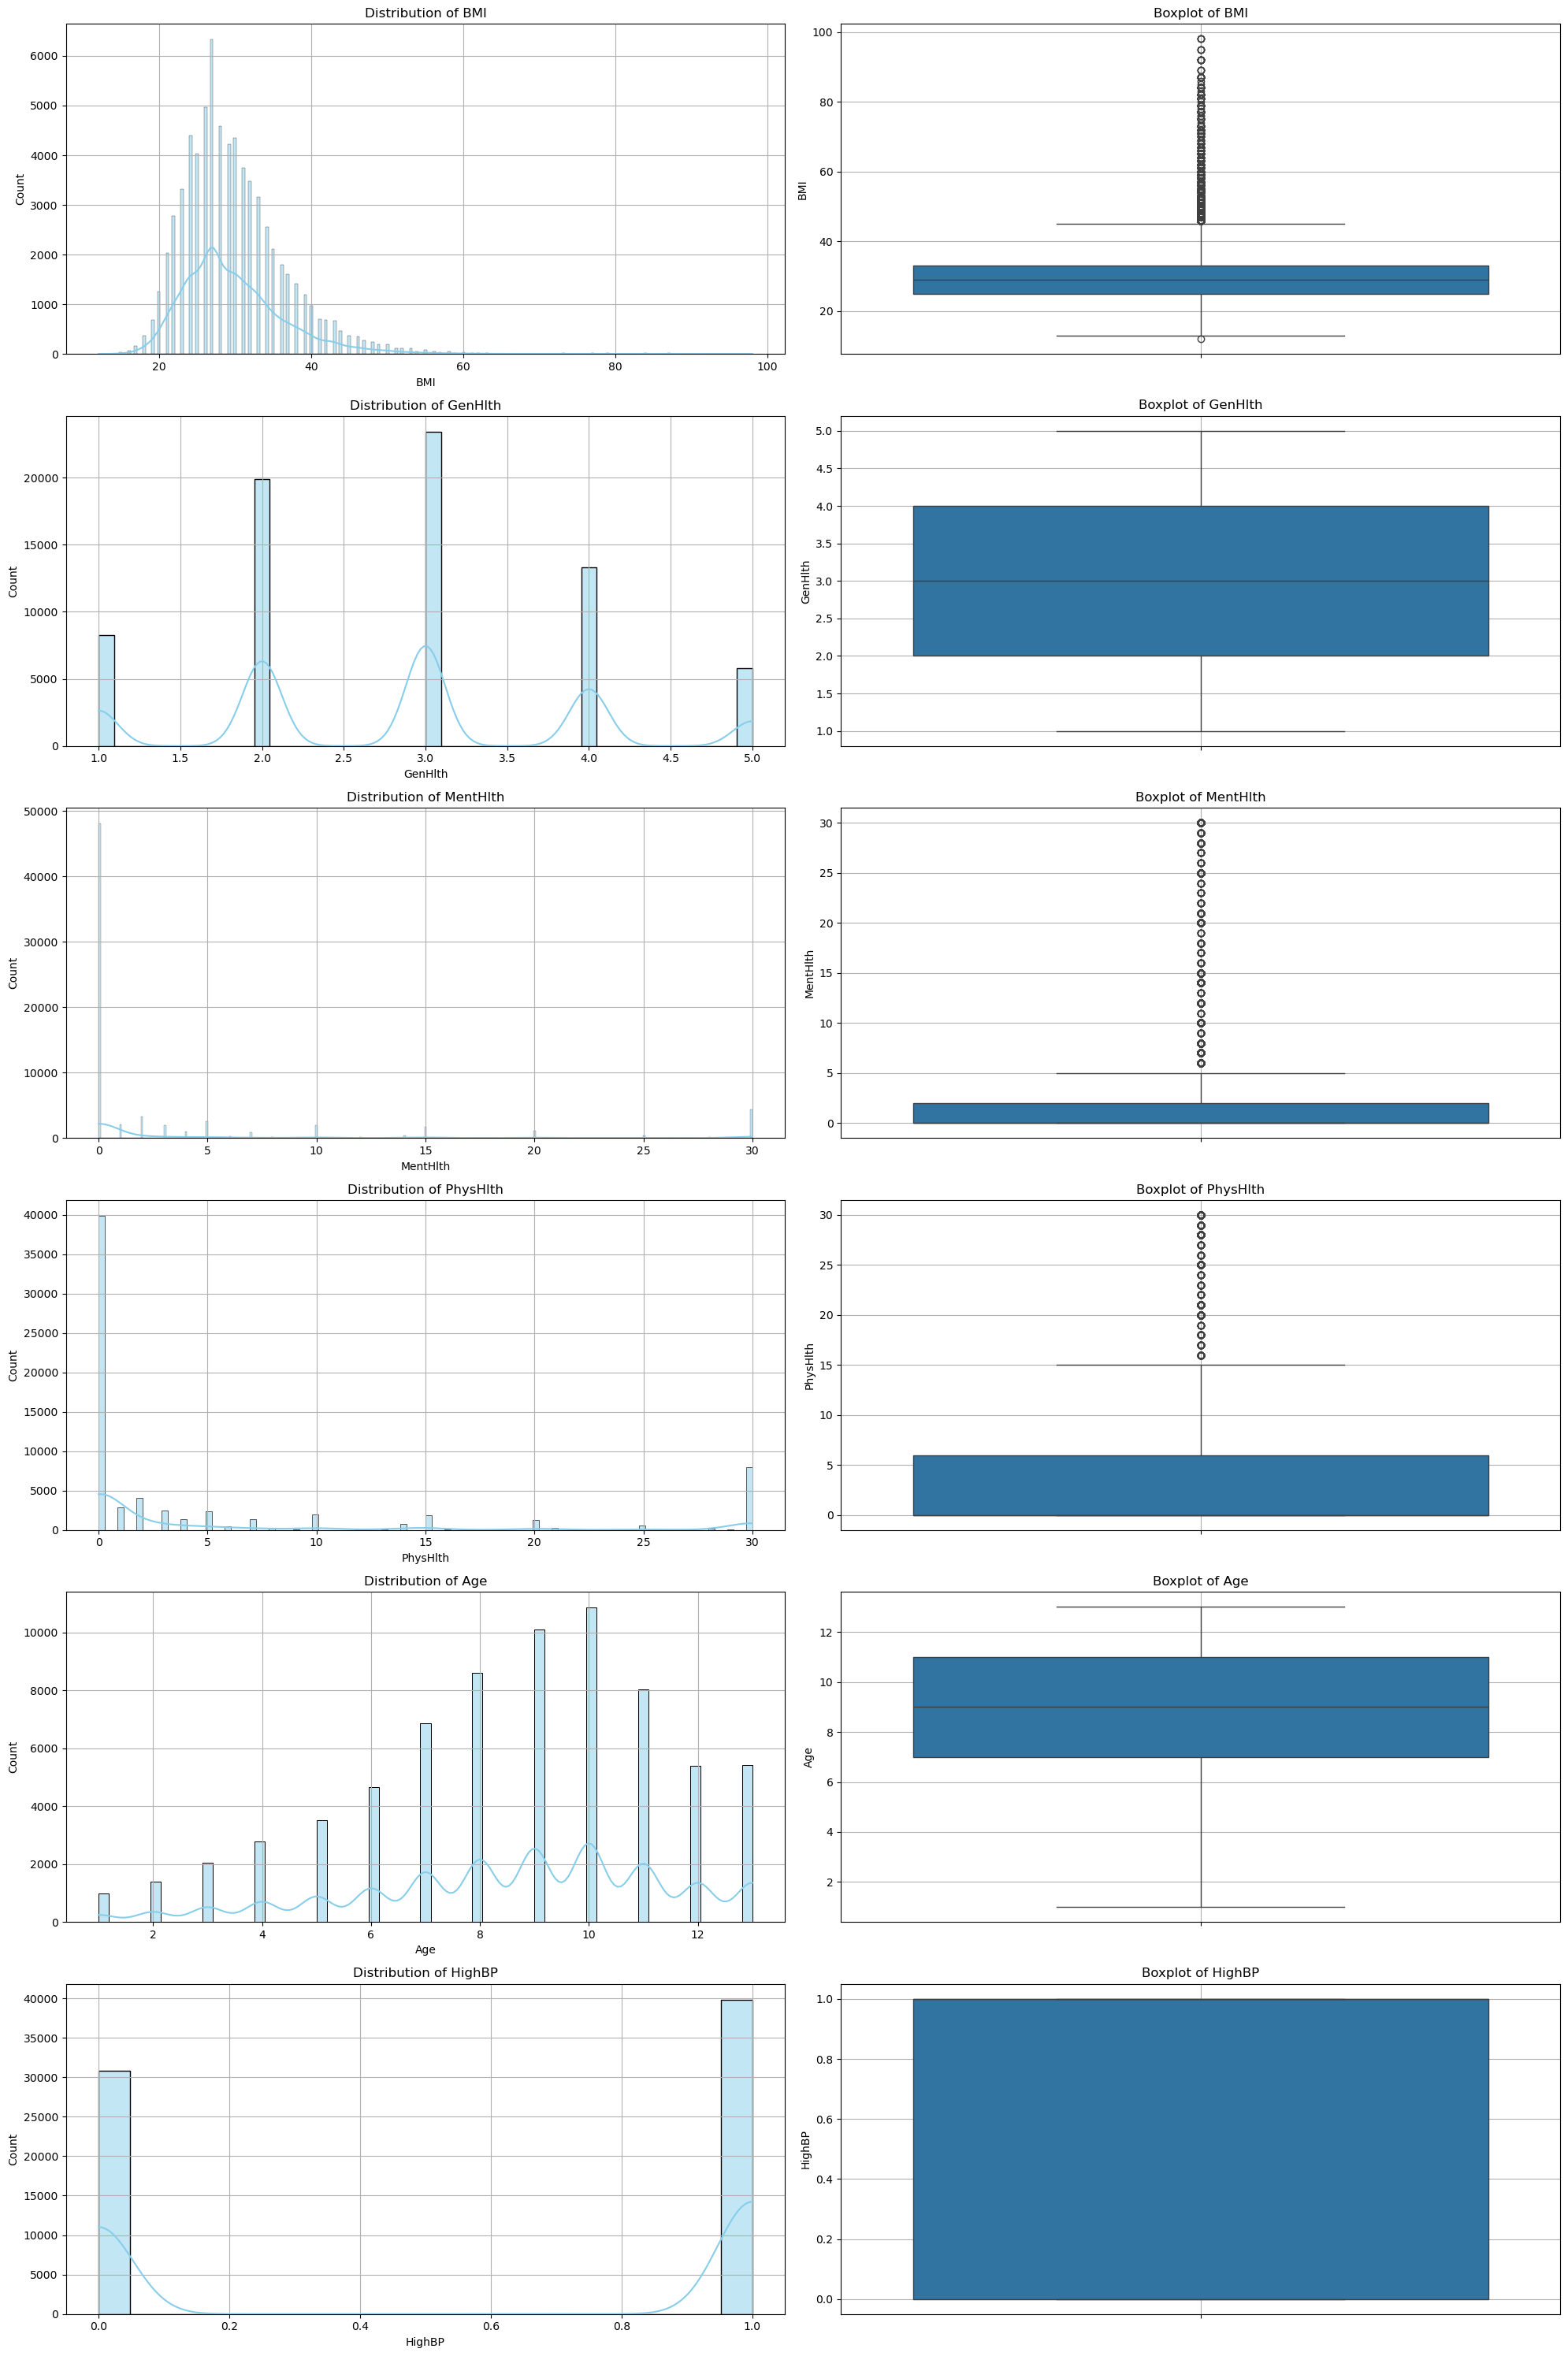

In [15]:
# Select features to visualize
features = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "HighBP"]

# Create subplots: 3 rows, 2 columns
f, axes = plt.subplots(len(features), 2, figsize=(20, 5 * len(features)))

for i, feature in enumerate(features):
    sns.histplot(X[feature], kde=True, ax=axes[i][0], color='skyblue')
    axes[i][0].set_title(f"Distribution of {feature}")
    axes[i][0].grid()

    sns.boxplot(y=X[feature], ax=axes[i][1])  # Removed palette
    axes[i][1].set_title(f"Boxplot of {feature}")
    axes[i][1].grid()

plt.tight_layout()
plt.show()

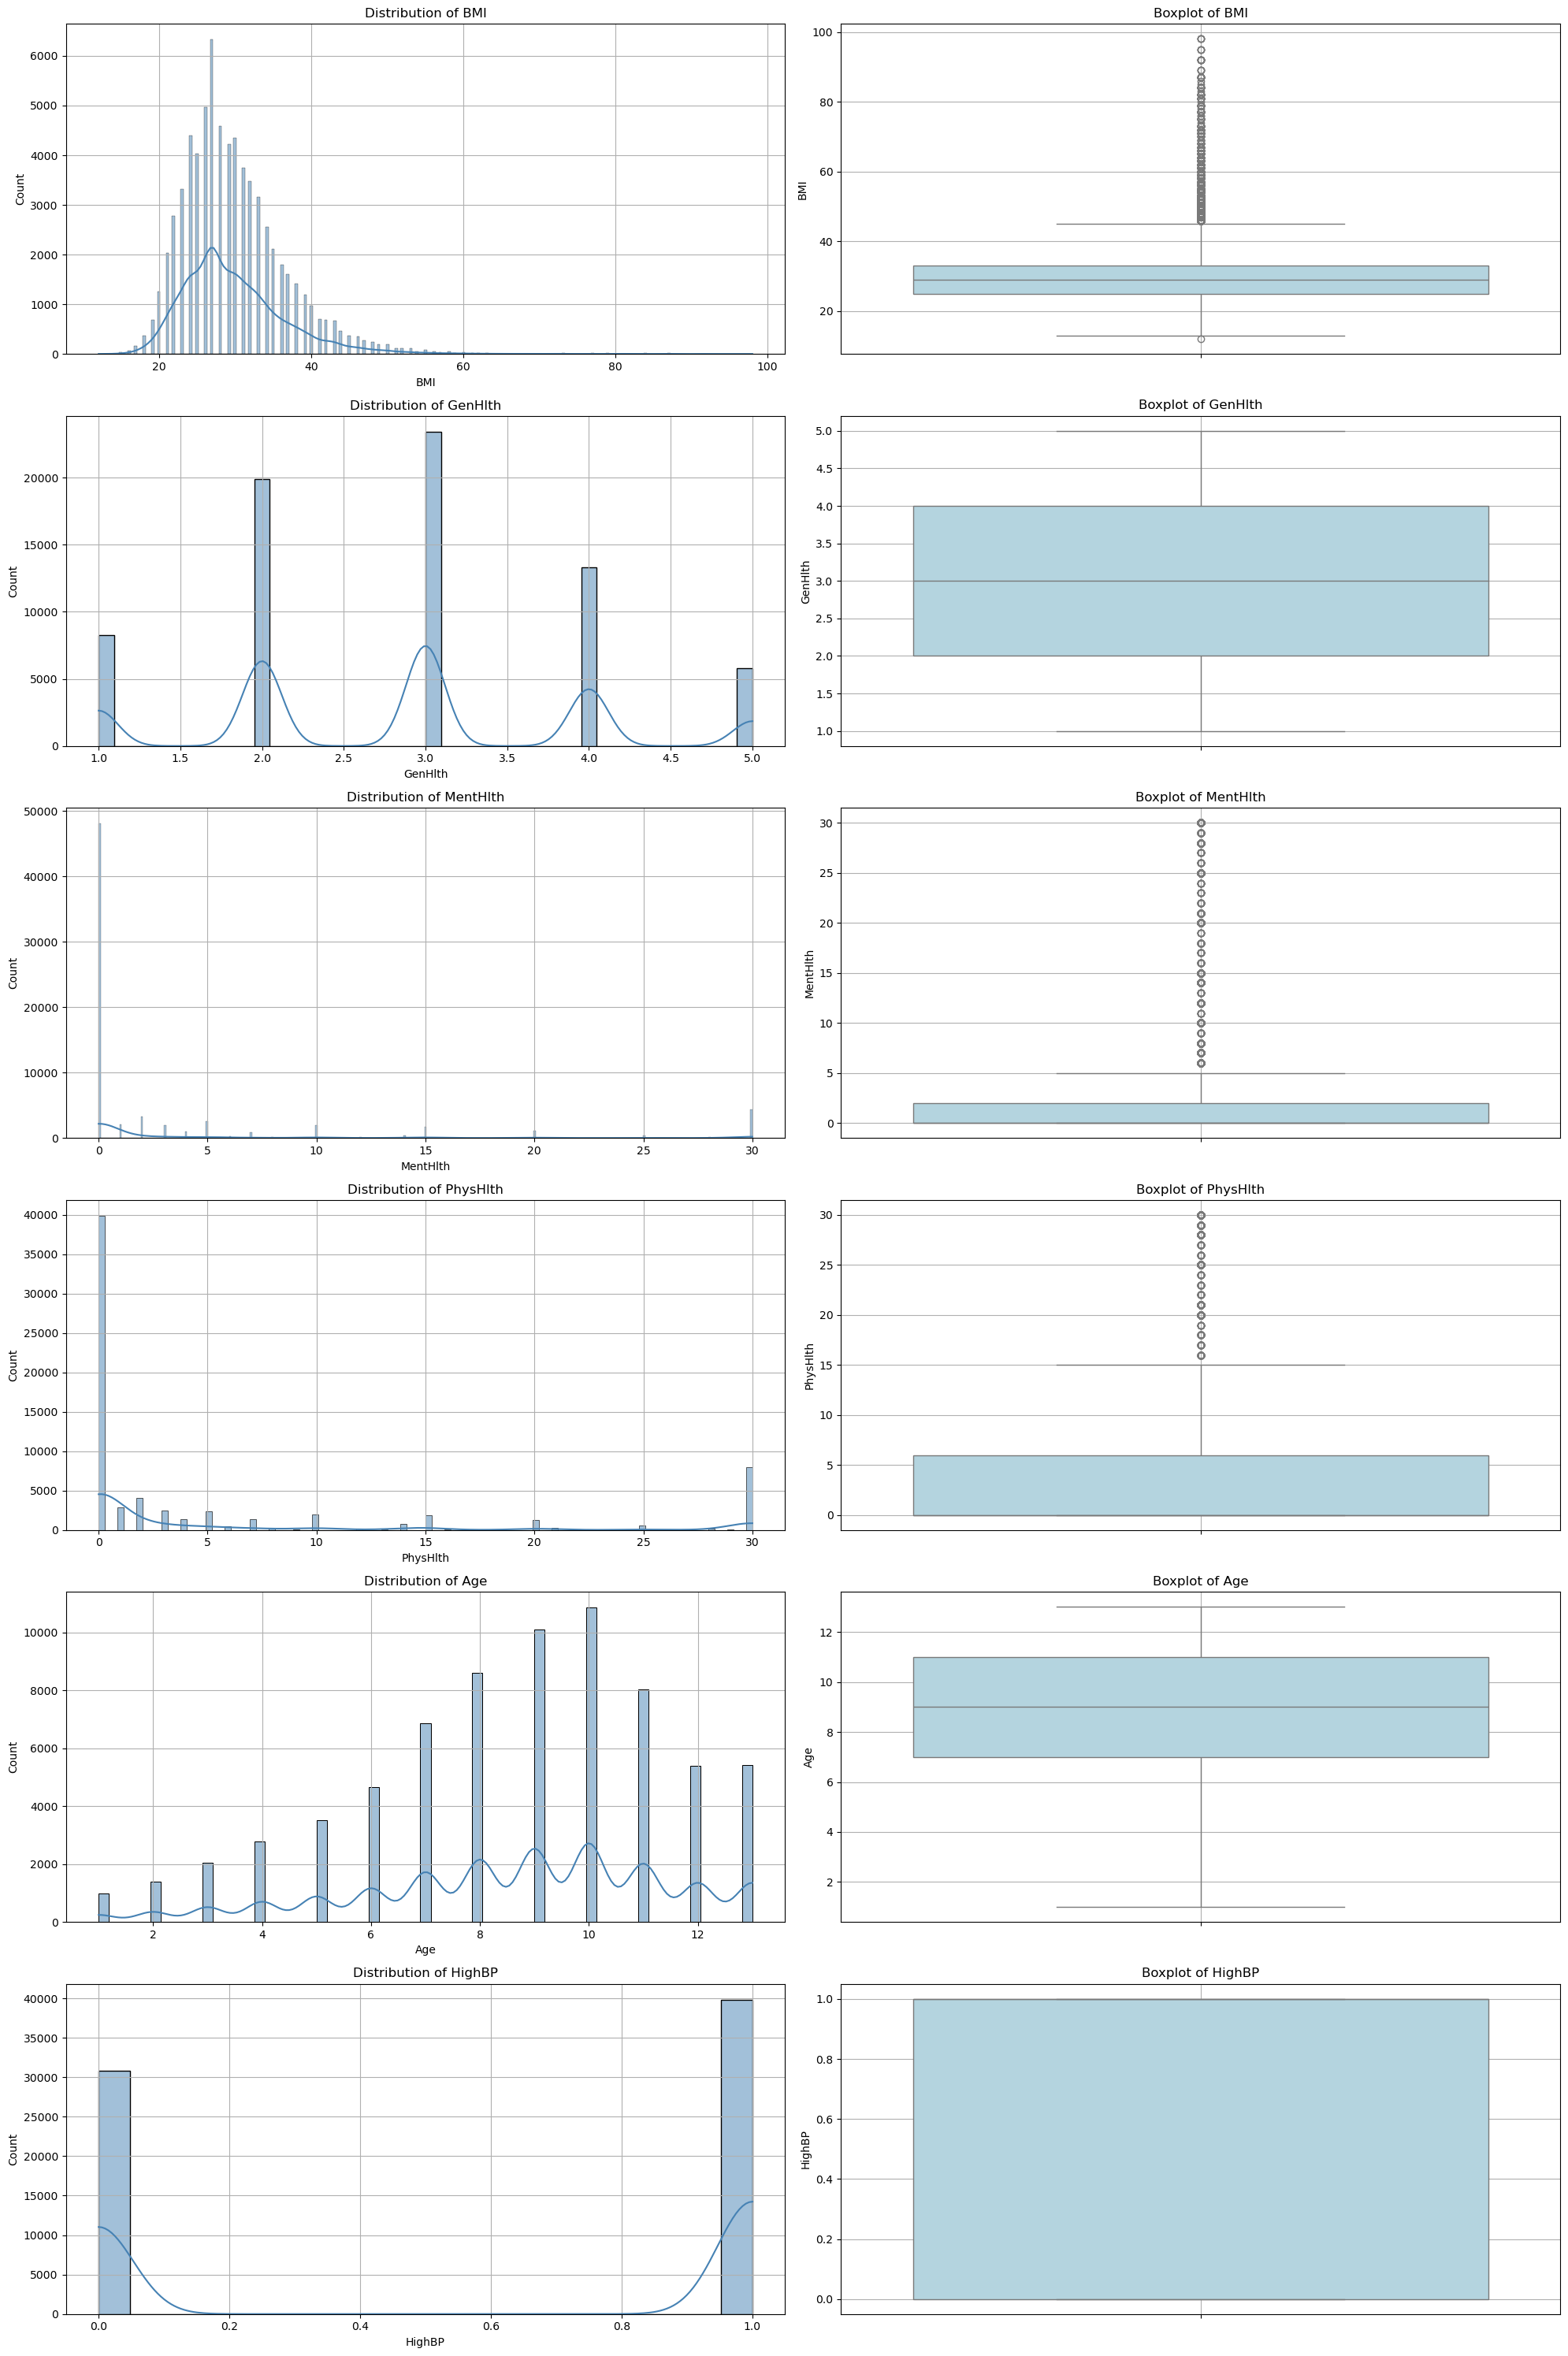

In [16]:

# Select features to visualize
features = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "HighBP"]

# Create subplots: one row per feature, two columns (distplot + boxplot)
f, axes = plt.subplots(len(features), 2, figsize=(20, 5 * len(features)))

for i, feature in enumerate(features):
    # Distribution plot
    sns.histplot(X[feature], kde=True, ax=axes[i][0], color='steelblue')
    axes[i][0].set_title(f"Distribution of {feature}")
    axes[i][0].grid()

    # Boxplot (no palette to avoid FutureWarning)
    sns.boxplot(y=X[feature], ax=axes[i][1], color='lightblue')
    axes[i][1].set_title(f"Boxplot of {feature}")
    axes[i][1].grid()

plt.tight_layout()
plt.show()

In [17]:
def handle_outliers_mad(df, column):
    median = df[column].median()
    mad = np.median(np.abs(df[column] - median))
    threshold = 3 * mad
    df[column] = df[column].apply(lambda x: median if abs(x - median) > threshold else x)
    return df

# Apply to selected features
features_to_clean = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "HighBP"]

for feature in features_to_clean:
    X = handle_outliers_mad(X, feature)
    print(f"{feature} median after MAD treatment: {X[feature].median()}")

BMI median after MAD treatment: 29.0
GenHlth median after MAD treatment: 3.0
MentHlth median after MAD treatment: 0.0
PhysHlth median after MAD treatment: 0.0
Age median after MAD treatment: 9.0
HighBP median after MAD treatment: 1.0


📊 Distribution Comparison: Before vs After Outlier Handling

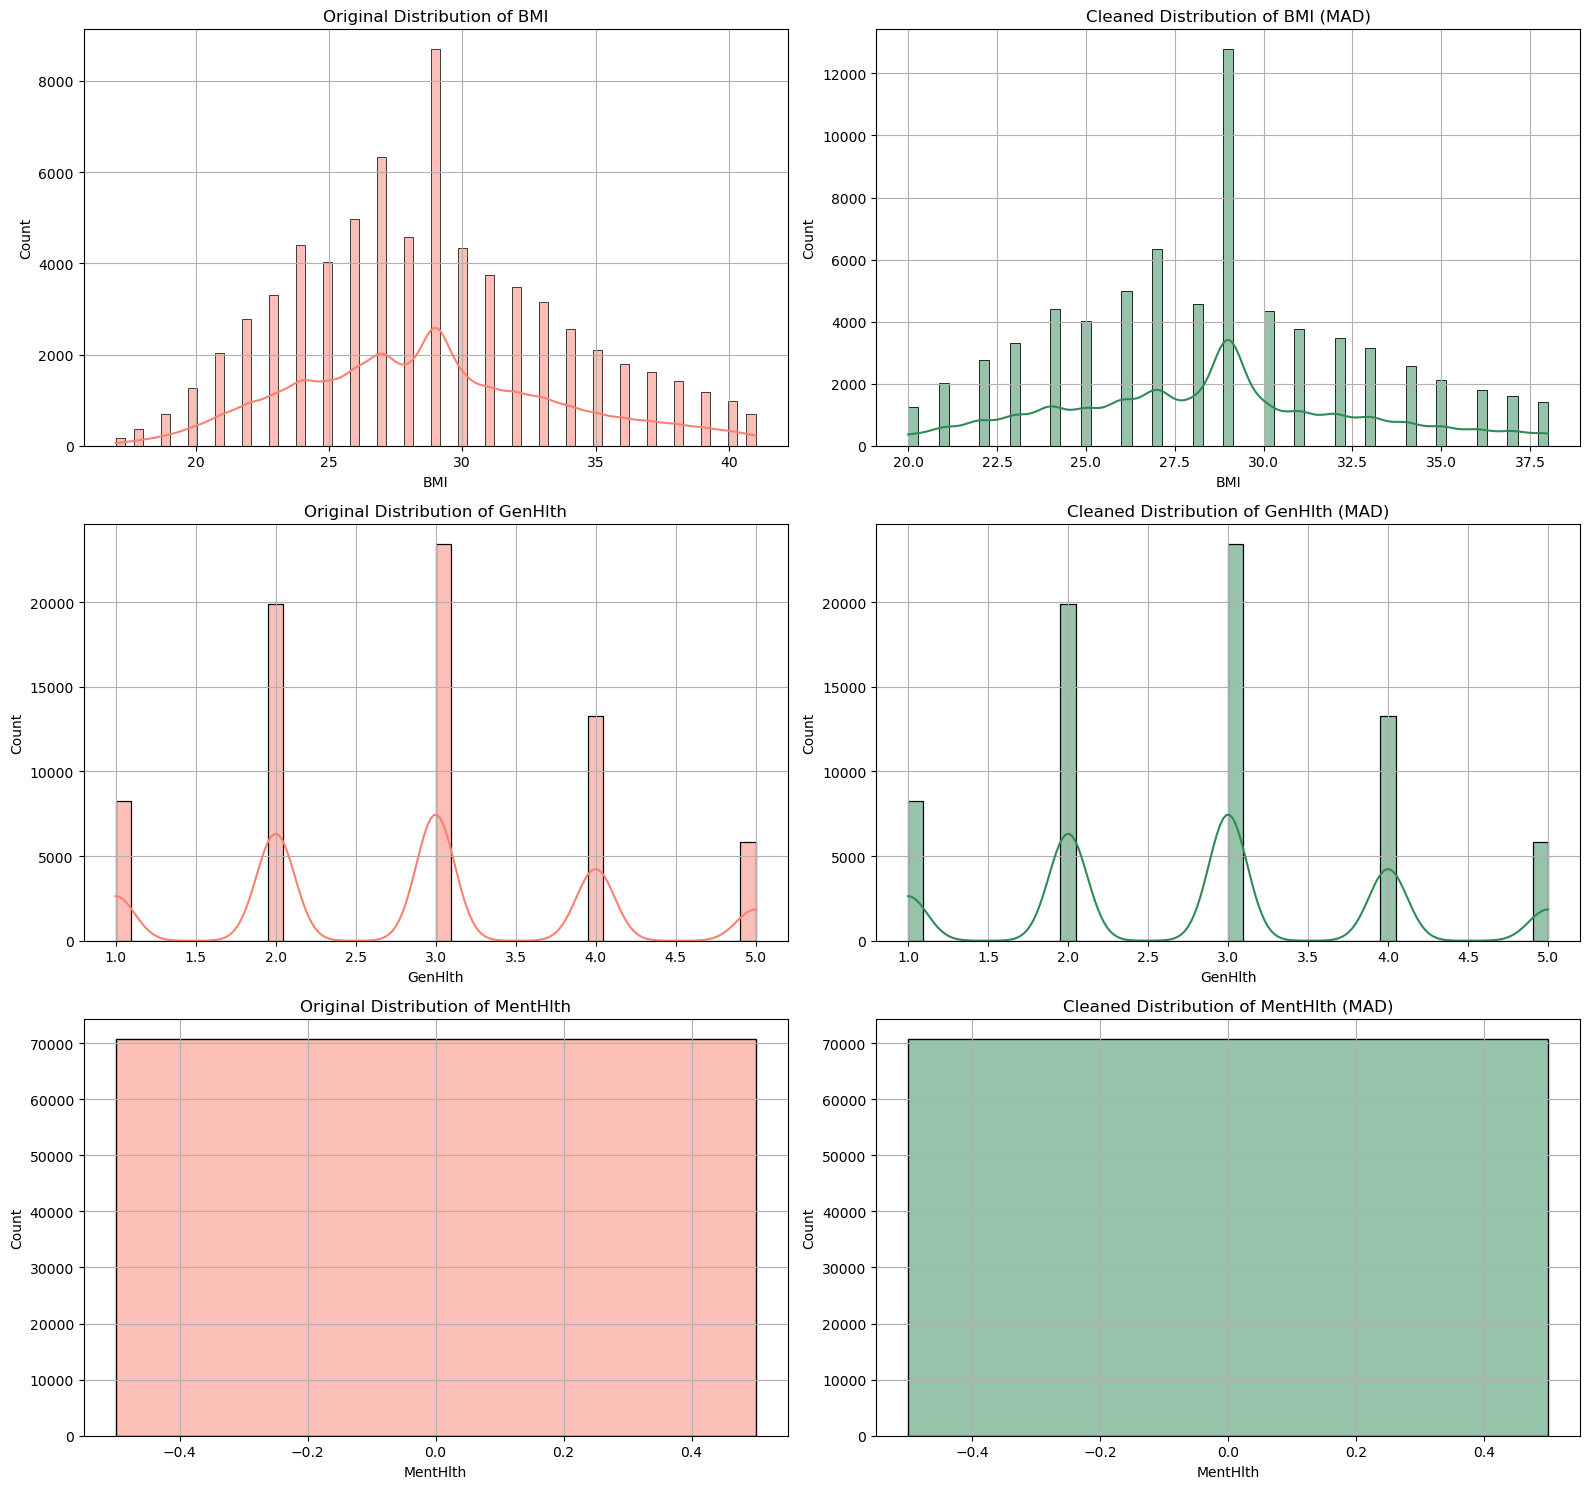

In [18]:

# Backup original data before outlier treatment
X_original = X.copy()

# Apply MAD-based outlier handling
def handle_outliers_mad(df, column):
    median = df[column].median()
    mad = np.median(np.abs(df[column] - median))
    threshold = 3 * mad
    df[column] = df[column].apply(lambda x: median if abs(x - median) > threshold else x)
    return df

features_to_compare = ["BMI", "GenHlth", "MentHlth"]

X_cleaned = X_original.copy()
for feature in features_to_compare:
    X_cleaned = handle_outliers_mad(X_cleaned, feature)

# Plot distributions before and after
fig, axes = plt.subplots(len(features_to_compare), 2, figsize=(16, 5 * len(features_to_compare)))

for i, feature in enumerate(features_to_compare):
    sns.histplot(X_original[feature], kde=True, ax=axes[i][0], color='salmon')
    axes[i][0].set_title(f"Original Distribution of {feature}")
    axes[i][0].grid()

    sns.histplot(X_cleaned[feature], kde=True, ax=axes[i][1], color='seagreen')
    axes[i][1].set_title(f"Cleaned Distribution of {feature} (MAD)")
    axes[i][1].grid()

plt.tight_layout()
plt.show()


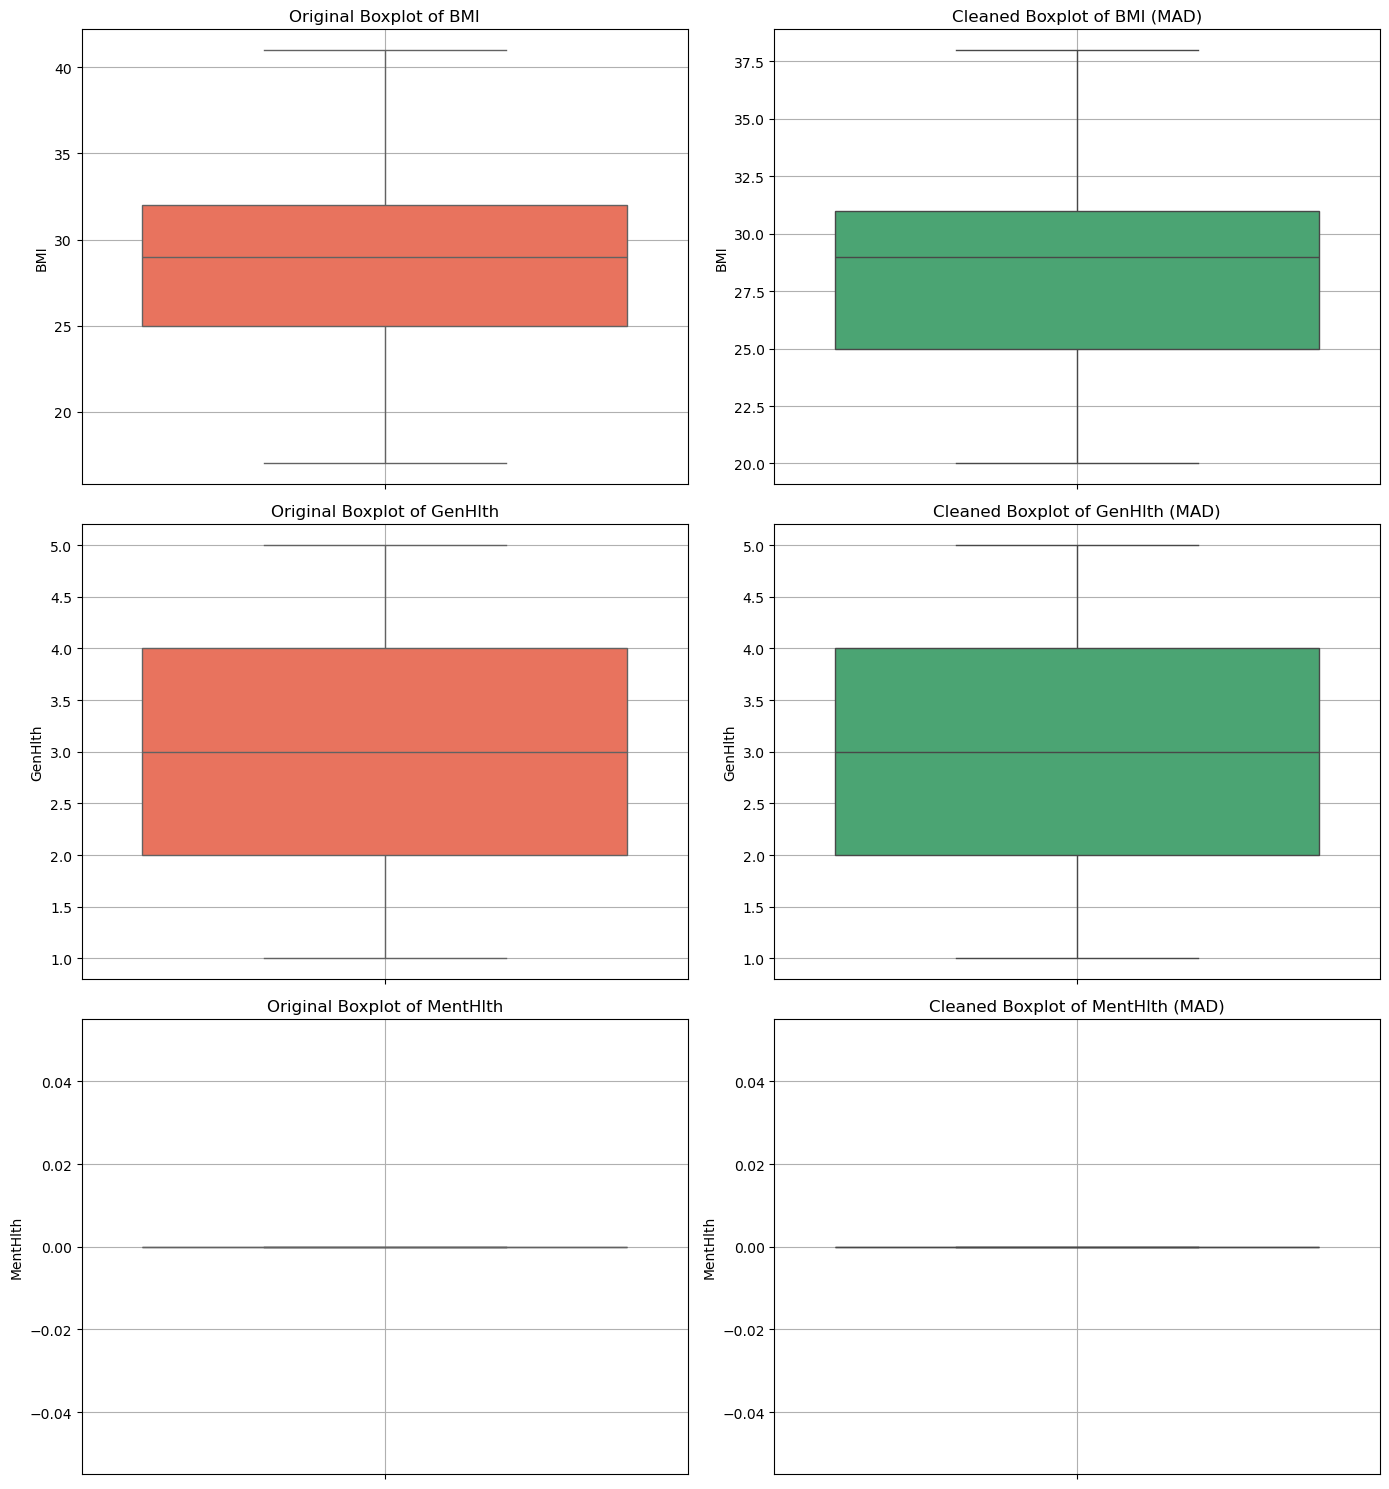

In [19]:

# Plot boxplots before and after
fig, axes = plt.subplots(len(features_to_compare), 2, figsize=(14, 5 * len(features_to_compare)))

for i, feature in enumerate(features_to_compare):
    sns.boxplot(y=X_original[feature], ax=axes[i][0], color='tomato')
    axes[i][0].set_title(f"Original Boxplot of {feature}")
    axes[i][0].grid()

    sns.boxplot(y=X_cleaned[feature], ax=axes[i][1], color='mediumseagreen')
    axes[i][1].set_title(f"Cleaned Boxplot of {feature} (MAD)")
    axes[i][1].grid()

plt.tight_layout()
plt.show()

Visualization of other Attributes with BMI & Diabetes

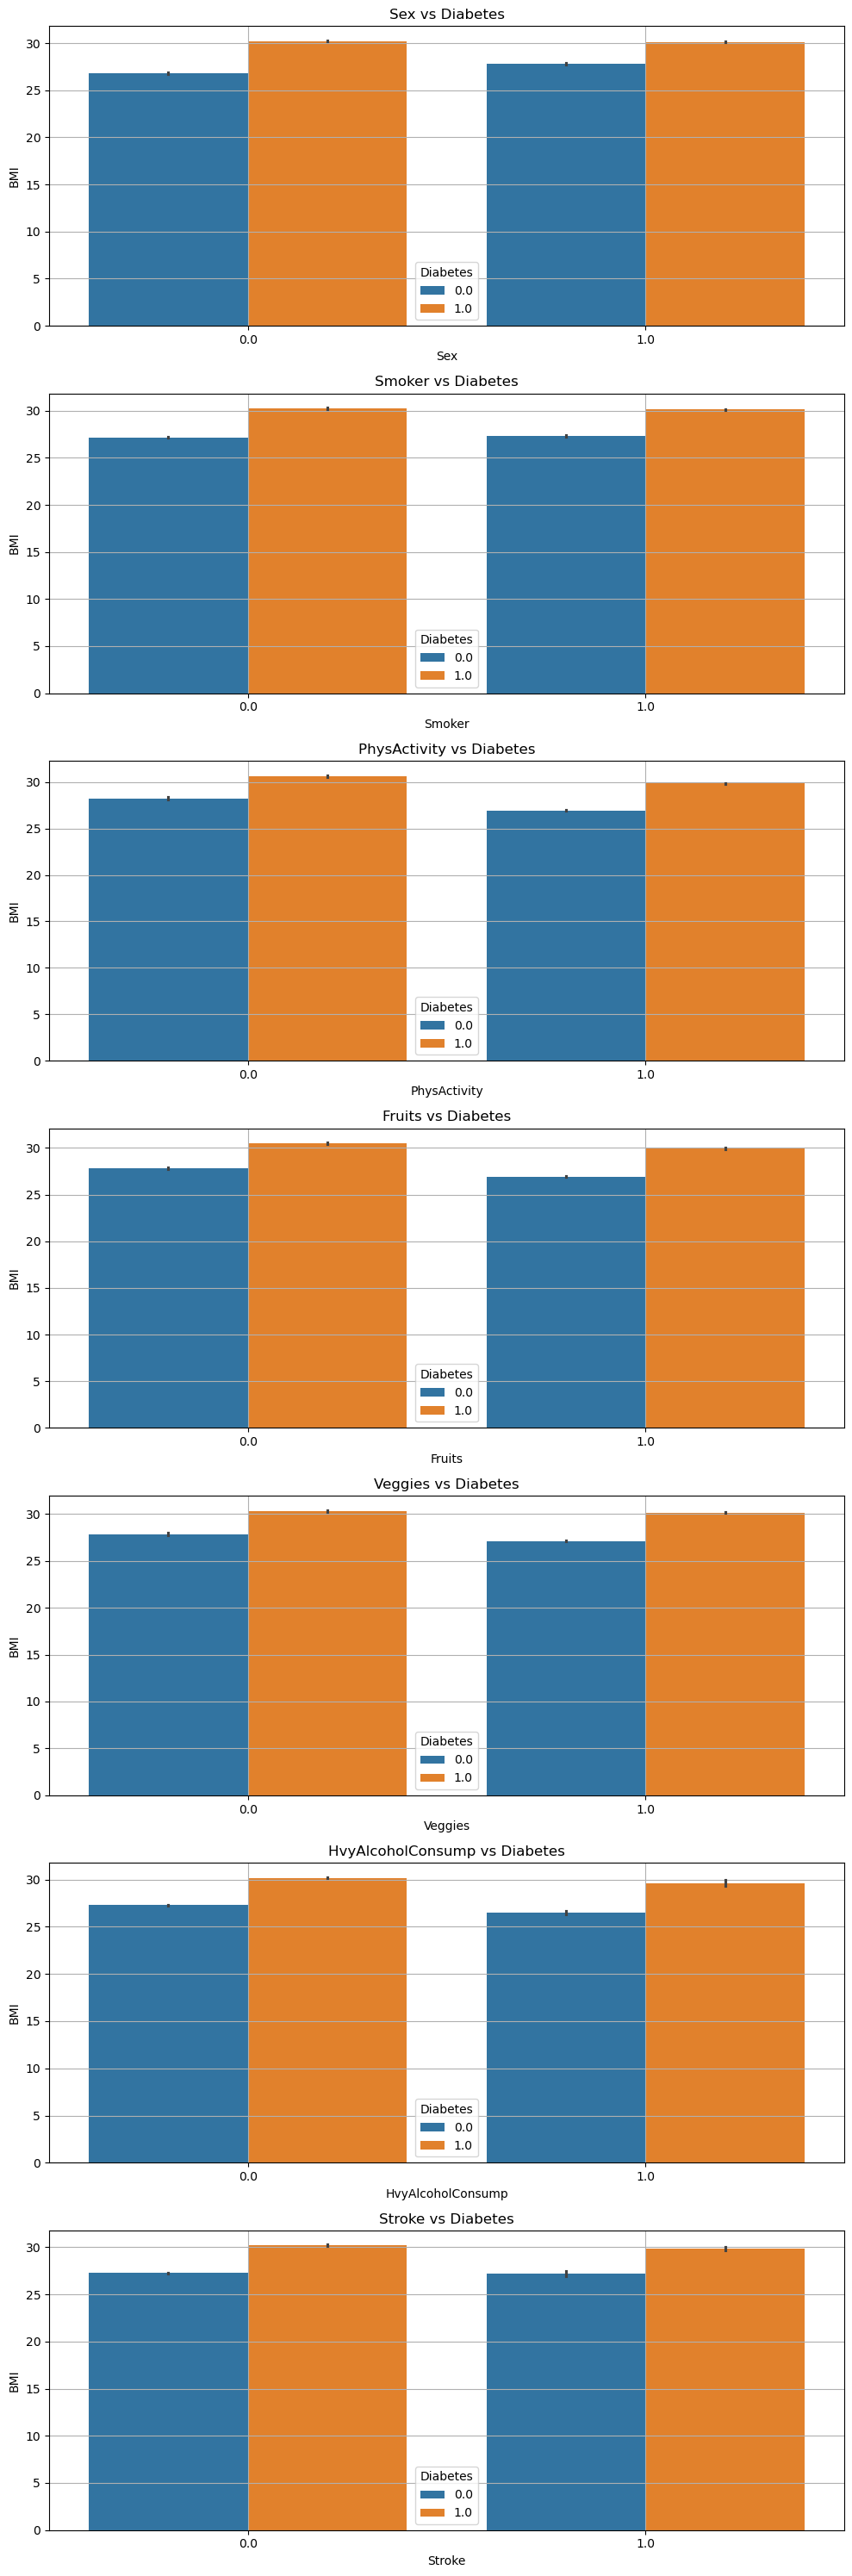

In [22]:

# Select categorical features to visualize against BMI
categorical_features = ["Sex", "Smoker", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "Stroke"]

# Create subplots
f, axes = plt.subplots(len(categorical_features), 1, figsize=(10, 30))

for i, feature in enumerate(categorical_features):
    sns.barplot(x=X[feature], y=X["BMI"], hue=X["Diabetes"], ax=axes[i])
    axes[i].set_title(f"{feature} vs Diabetes")
    axes[i].grid()

plt.tight_layout()
plt.show()

#Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#Split the dataset
X["is_train"] = np.random.uniform(0, 1, len(X)) <= 0.75
train, test = X[X["is_train"] == True], X[X["is_train"] == False]
print("Training observations:", len(train))
print("Testing observations:", len(test))

Training observations: 52972
Testing observations: 17720


In [42]:
# Select features and target
features = X.columns.drop(["Diabetes", "is_train"])
target = "Diabetes"

In [48]:
 # Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# Evaluate accuracy
y_pred = rf.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 0.7006153193295142


In [46]:
# Feature Importance
importance_scores = list(zip(features, clf.feature_importances_))
importance_df = pd.DataFrame(importance_scores, columns=["Feature", "Importance"]).sort_values(by="Importance", ascending=False)
print(importance_df)

                 Feature  Importance
4                    BMI    0.297920
0                    Age    0.197613
11               GenHlth    0.167821
2               HighChol    0.065778
14              DiffWalk    0.037738
8                 Fruits    0.037686
5                 Smoker    0.035582
1                    Sex    0.033687
9                Veggies    0.030617
7           PhysActivity    0.030108
6   HeartDiseaseorAttack    0.027314
15                Stroke    0.015703
10     HvyAlcoholConsump    0.012742
3              CholCheck    0.009689
12              MentHlth    0.000000
13              PhysHlth    0.000000
16                HighBP    0.000000


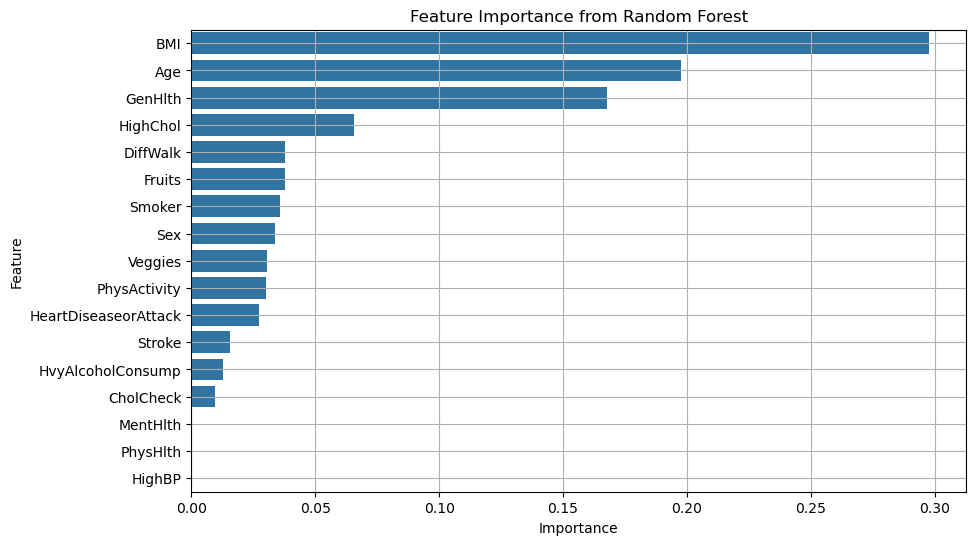

In [49]:
# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="Importance", y="Feature")
plt.title("Feature Importance from Random Forest")
plt.grid()
plt.show()

In [55]:
# Save refined dataset with top features
top_features = importance_df["Feature"].head(10).tolist()
final_dataset = X[top_features + [target]].copy()
final_dataset.to_csv("final_diabetes_train.csv", index=False)

In [56]:
final_dataset.describe(include="all")  

,BMI,Age,GenHlth,HighChol,DiffWalk,Fruits,Smoker,Sex,Veggies,PhysActivity,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,28.708963,8.833079,2.837082,0.525703,0.252730,0.611795,0.475273,0.456997,0.788774,0.703036,0.500000
std,4.977768,2.534944,1.113565,0.499342,0.434581,0.487345,0.499392,0.498151,0.408181,0.456924,0.500004
min,17.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,29.000000,9.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.500000
75%,32.000000,11.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,41.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
